In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sympy as sym

Thermodynamic Data:
* `R`: Universal Gas Constant
* `C_P`: Heat Capacity Data
* `delta_hf_nh3`: Enthalpy of formation of NH3 (standard conditions)
* `s_n2`, `s_h2`, `s_nh3`: Standard entropy for reactants and product


In [2]:
R = 8.314 #J/mol

C_P = pd.DataFrame(
    [[19.99563, 49.77119, -15.37599, 1.921168, 0.189174],
     [33.066178, -11.363417, 11.432816, -2.772874, -0.158558],
     [28.98641, 1.853978, -9.647459, 16.63537, 0.000117]]
).transpose()
C_P.index = ["A", "B", "C", "D", "E"]
C_P.columns = ["NH3", "H2", "N2"]

delta_hf_nh3 = -45.94 * 1000 * 2 #J/mol

s_n2 = 191.609 #J/mol
s_h2 = 130.680 #J/mol
s_nh3 = 192.77 #J/mol

In [3]:
delta_h1 = delta_hf_nh3

A_, B_, C_, D_, E_, T_ = sym.symbols("A, B, C, D, E, T")
C_P_ = A_ + B_*(T_/1000) + C_*(T_/1000)**2 + D_*(T_/1000)**3 + E_*(T_/1000)**-2
C_P_
delta_h_sens = sym.integrate(C_P_, (T_,298,T_))

In [4]:
delta_h2 = 2*delta_h_sens.subs(
    [(A_,C_P["NH3"][0]), (B_, C_P["NH3"][1]), (C_, C_P["NH3"][2]), (D_, C_P["NH3"][3]),(E_,C_P["NH3"][4])]
)

delta_h3 = delta_h_sens.subs(
    [(A_,C_P["N2"][0]), (B_, C_P["N2"][1]), (C_, C_P["N2"][2]), (D_, C_P["N2"][3]),(E_,C_P["N2"][4])]
) + 3* delta_h_sens.subs(
    [(A_,C_P["H2"][0]), (B_, C_P["H2"][1]), (C_, C_P["H2"][2]), (D_, C_P["H2"][3]),(E_,C_P["H2"][4])]
)

delta_h_rxn = delta_h1 + delta_h2 - delta_h3
delta_h_rxn

-1.118603e-9*T**4 - 1.84676563333333e-5*T**3 + 0.0658893265*T**2 - 88.193684*T - 68086.5229044564 - 853905.0/T

In [5]:
delta_s1 = 2*s_nh3 - (3*s_h2 + s_n2)

delta_s_sens = sym.integrate(C_P_/T_, (T_,298,T_))

delta_s2 = 2*delta_s_sens.subs(
    [(A_,C_P["NH3"][0]), (B_, C_P["NH3"][1]), (C_, C_P["NH3"][2]), (D_, C_P["NH3"][3]),(E_,C_P["NH3"][4])]
)
delta_s3 = delta_s_sens.subs(
    [(A_,C_P["N2"][0]), (B_, C_P["N2"][1]), (C_, C_P["N2"][2]), (D_, C_P["N2"][3]),(E_,C_P["N2"][4])]
) + 3* delta_s_sens.subs(
    [(A_,C_P["H2"][0]), (B_, C_P["H2"][1]), (C_, C_P["H2"][2]), (D_, C_P["H2"][3]),(E_,C_P["H2"][4])]
)

delta_s_rxn = delta_s1 + delta_s2 - delta_s3
delta_s_rxn

-1.49147066666667e-9*T**3 - 2.77014845e-5*T**2 + 0.131778653*T - 88.193684*log(T) - 230.071759212497 + 88.193684*log(298) - 426952.5/T**2

In [6]:
K = sym.exp(-delta_h_rxn/(R*T_)+delta_s_rxn/R)

T = np.linspace(300,900,6001)
K_T = np.array([float(K.subs(T_,temp)) for temp in T])

In [8]:
K_, P_, X_ = sym.symbols("K_T p_ X")
eqn = sym.Eq(K_, 16*X_**2*(X_- 2)**2/((1 - X_)*(3 - 3*X_)**3)*1/P_**2)
sym.solve(eqn, X_)

[1 - 2*sqrt(-3*sqrt(3)*sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)),
 1 - 2*sqrt(3*sqrt(3)*sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)),
 2*sqrt(-3*sqrt(3)*sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)) + 1,
 2*sqrt(3*sqrt(3)*sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)) + 1]

In [9]:
P = np.array([1e5, 2e5, 5e5, 10e5]) # Pressures in Pa
p_ = P[0]

X_  = [
    1 - 2*np.sqrt(-3*np.sqrt(3)*np.sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)),
    1 - 2*np.sqrt(3*np.sqrt(3)*np.sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)),
    2*np.sqrt(-3*np.sqrt(3)*np.sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)) + 1,
    2*np.sqrt(3*np.sqrt(3)*np.sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)) + 1
]

X_

C:\Users\abhir\AppData\Local\Temp\ipykernel_20460\987156279.py:5: RuntimeWarning: invalid value encountered in sqrt
  1 - 2*np.sqrt(-3*np.sqrt(3)*np.sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)),
C:\Users\abhir\AppData\Local\Temp\ipykernel_20460\987156279.py:7: RuntimeWarning: invalid value encountered in sqrt
  2*np.sqrt(-3*np.sqrt(3)*np.sqrt(K_T)*p_/(27*K_T*p_**2 - 16) - 4/(27*K_T*p_**2 - 16)) + 1,


[array([nan, nan, nan, ..., nan, nan, nan]),
 array([0.99989266, 0.99989233, 0.999892  , ..., 0.92070114, 0.92066917,
        0.92063719]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([1.00010734, 1.00010767, 1.000108  , ..., 1.07929886, 1.07933083,
        1.07936281])]

In [11]:
x = [0.5*(np.sqrt((12*(4*p*np.sqrt(3*K_T)-9*p**2*K_T))/ (27*p**2*K_T-16)+4)+2) for p in P]

x = [1 - 2*np.sqrt(3*np.sqrt(3)*np.sqrt(K_T)*p/(27*K_T*p**2 - 16) - 4/(27*K_T*p**2 - 16)) for p in P]

In [12]:
df = (
    pd.DataFrame(x)
    .transpose()
    .set_index(T)
    .rename_axis("Temperature")
    )
df.columns = ["1 bar", "2 bar", "5 bar", "10 bar"]

df

,1 bar,2 bar,5 bar,10 bar
Temperature,,,,
300.0,0.999893,0.999924,0.999952,0.999966
300.1,0.999892,0.999924,0.999952,0.999966
300.2,0.999892,0.999924,0.999952,0.999966
300.3,0.999892,0.999923,0.999952,0.999966
300.4,0.999891,0.999923,0.999951,0.999966
...,...,...,...,...
899.6,0.920765,0.943884,0.964476,0.974873
899.7,0.920733,0.943862,0.964461,0.974862
899.8,0.920701,0.943839,0.964447,0.974852


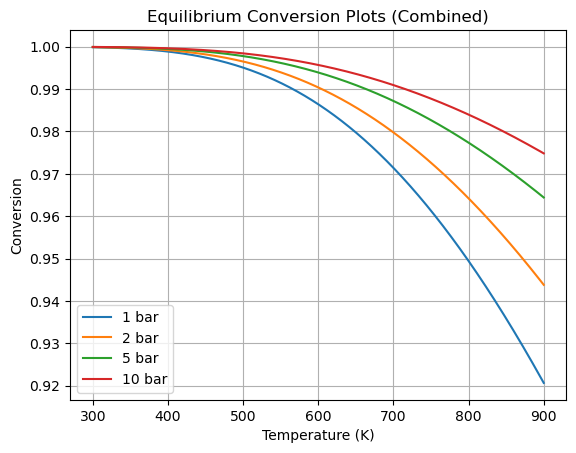

In [13]:
df.plot(
    ylabel="Conversion", 
    xlabel="Temperature (K)",
    title="Equilibrium Conversion Plots (Combined)",
    grid=True
    );

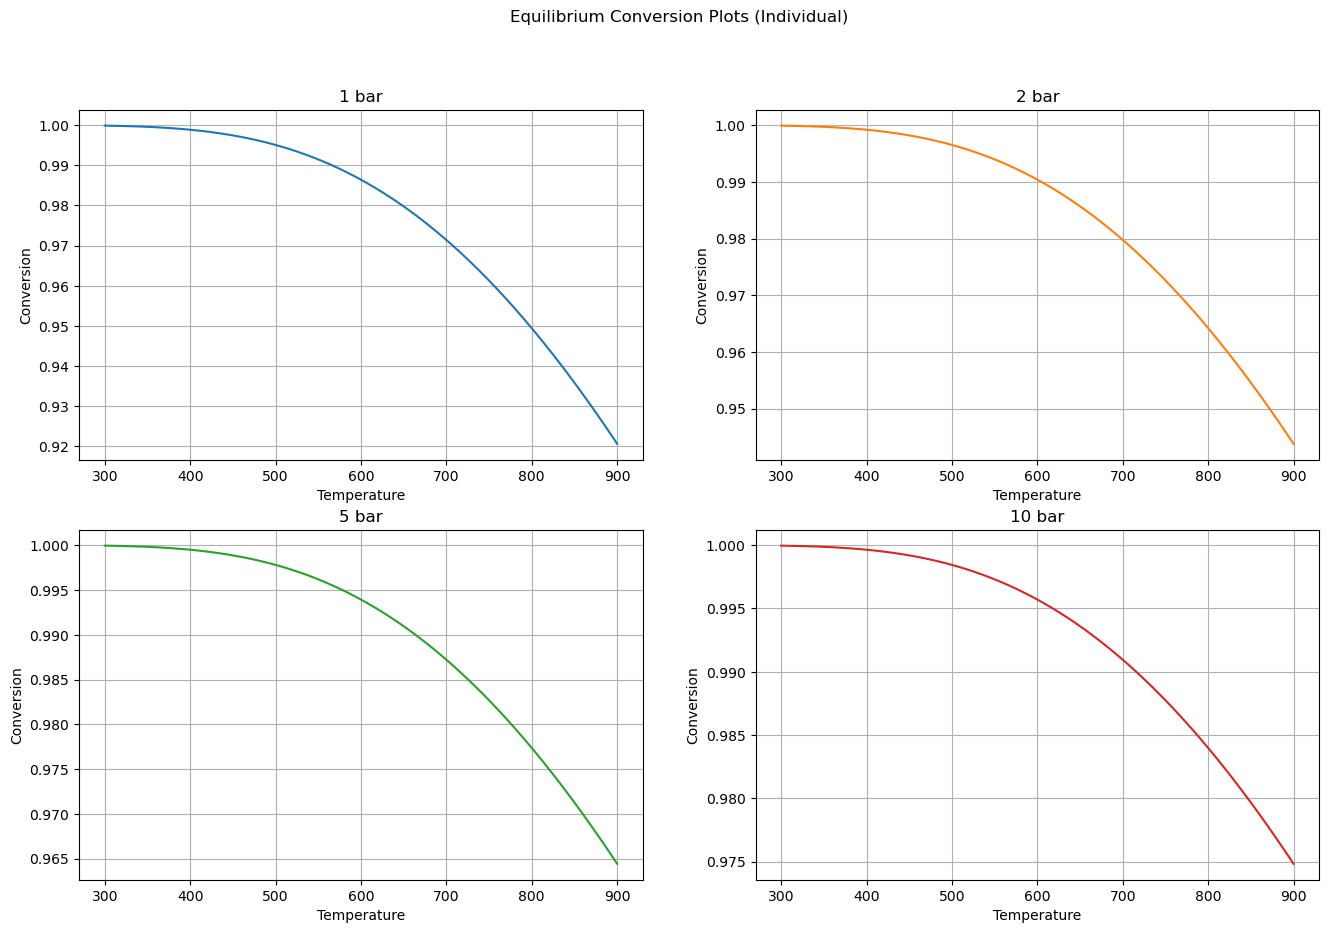

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(16,10))
fig.suptitle('Equilibrium Conversion Plots (Individual)')
df["1 bar"].plot(ax=axs[0,0], color="C0", ylabel="Conversion", title="1 bar", grid=True)
df["2 bar"].plot(ax=axs[0,1], color="C1", ylabel="Conversion", title="2 bar", grid=True)
df["5 bar"].plot(ax=axs[1,0], color="C2", ylabel="Conversion", title="5 bar", grid=True)
df["10 bar"].plot(ax=axs[1,1], color="C3", ylabel="Conversion", title="10 bar", grid=True);